Installing XGBoost

In [25]:
!pip install xgboost

Import necessary packages

In [26]:
import numpy as np
import pandas as pd
import xgboost as xgb
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [27]:
df_fake= pd.read_csv('../data/Fake.csv')  # Example dataset
df_real = pd.read_csv('../data/True.csv')


In [28]:
#Fake News
print(df_fake['title'][0])
print(df_fake['text'][0])

 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this d

In [29]:
print(df_real['title'][1])
print(df_real['text'][1])

U.S. military to accept transgender recruits on Monday: Pentagon
WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District C

### Labeling Fake News as 1 Real News as 0

In [30]:
df_fake['label'] = 1  # Fake news = 1
df_fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [31]:
df_real['label'] = 0 # Real news = 0
df_real

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


### Joining Both Real and Fake News as 1 DataSet

In [32]:
df_both = pd.concat([df_fake, df_real], ignore_index=True)
df_both

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [33]:
df_both = df_both.drop(['date','subject'],axis=1)
df_both

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [34]:
df_both

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


### Reshuffling of News

In [35]:
df_both = df_both.sample(frac=1, random_state=42).reset_index(drop=True)
df_both

,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",0
...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,1
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,0
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,0
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,1


### Text Preprocessing To Remove Brackets, URLs, Punctuations or Numbers

In [36]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

df_both['combined_text'] = df_both['title'] + " " + df_both['text']
df_both['clean_text'] = df_both['combined_text'].apply(clean_text)
df_both['clean_text']

0        ben stein calls out th circuit court committed...
1        trump drops steve bannon from national securit...
2        puerto rico expects us to lift jones act shipp...
3         oops trump just accidentally confirmed he lea...
4        donald trump heads for scotland to reopen a go...
                               ...                        
44893    unreal cbss ted koppel tells sean hannity hes ...
44894    pm may seeks to ease japans brexit fears durin...
44895    merkel difficult german coalition talks can re...
44896     trump stole an idea from north korean propaga...
44897    breaking hillary clintons state department gav...
Name: clean_text, Length: 44898, dtype: object

### Remove Useless Words such as "the", "and", "is", "in".
### Consider only the top 5000 most important words based on their TF-IDF score.

In [37]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
   df_both['clean_text'], df_both['label'], test_size=0.5, stratify=df_both['label'], random_state=42
)

### TF-IDF Vectorization

In [38]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english', ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Initialize the XGBoost model

In [39]:
# Initialize the XGBoost classifier
#model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=500, 
    max_depth=3,  # Reduced complexity
    learning_rate=0.01,  # Slightly increased
    subsample=0.5,  # More randomness
    colsample_bytree=0.7,  # Reduce feature reliance
    gamma=10,
    reg_lambda=6.0,  # Increased L2 regularization
    reg_alpha=3.0, # Increased L1 regularization
    min_child_weight=3,
    colsample_bylevel=0.5
)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.5f}")


/opt/anaconda3/envs/is217_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:26:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/is217_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:26:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/is217_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:26:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/is217_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:27:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_labe

Cross-Validation Accuracy: 0.99412


### Train the model

In [40]:
model.fit(X_train_tfidf, y_train)

/opt/anaconda3/envs/is217_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=10,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
# Predict the target on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1-score:  {f1:.5f}")

# Optional: Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.99305
Precision: 0.99777
Recall:    0.98893
F1-score:  0.99333

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10709
           1       1.00      0.99      0.99     11740

    accuracy                           0.99     22449
   macro avg       0.99      0.99      0.99     22449
weighted avg       0.99      0.99      0.99     22449

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10709
           1       1.00      0.99      0.99     11740

    accuracy                           0.99     22449
   macro avg       0.99      0.99      0.99     22449
weighted avg       0.99      0.99      0.99     22449



In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score, confusion_matrix
import numpy as np

# Predict the target on the test set (using TF-IDF features)
y_pred = model.predict(X_test_tfidf)

# Overall metrics
overall_accuracy  = accuracy_score(y_test, y_pred)
overall_precision = precision_score(y_test, y_pred)
overall_recall    = recall_score(y_test, y_pred)
overall_f1        = f1_score(y_test, y_pred)

print(f"Overall Accuracy:  {overall_accuracy:.5f}")
print(f"Overall Precision: {overall_precision:.5f}")
print(f"Overall Recall:    {overall_recall:.5f}")
print(f"Overall F1-score:  {overall_f1:.5f}")

# Compute per-class metrics (precision, recall, f1) with average=None.
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class    = recall_score(y_test, y_pred, average=None)
f1_per_class        = f1_score(y_test, y_pred, average=None)

# Get the sorted unique classes; for booleans, expect [False, True]
classes = np.unique(y_test)

# Print per-class precision, recall, and F1-score
for i, cls in enumerate(classes):
    print(f"\nMetrics for class {cls}:")
    print(f"Precision: {precision_per_class[i]:.5f}")
    print(f"Recall:    {recall_per_class[i]:.5f}")
    print(f"F1-score:  {f1_per_class[i]:.5f}")

# Calculate per-class accuracy using the confusion matrix.
# Here, per-class accuracy is the ratio of correct predictions for that class (diagonal) to the total true instances of that class.
cm = confusion_matrix(y_test, y_pred, labels=classes)
for i, cls in enumerate(classes):
    per_class_accuracy = cm[i, i] / np.sum(cm[i])
    print(f"\nPer-class Accuracy for {cls}: {per_class_accuracy:.5f}")

# Optional: Full classification report
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred))


Overall Accuracy:  0.99305
Overall Precision: 0.99777
Overall Recall:    0.98893
Overall F1-score:  0.99333

Metrics for class 0:
Precision: 0.98798
Recall:    0.99757
F1-score:  0.99275

Metrics for class 1:
Precision: 0.99777
Recall:    0.98893
F1-score:  0.99333

Per-class Accuracy for 0: 0.99757

Per-class Accuracy for 1: 0.98893

Full Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10709
           1       1.00      0.99      0.99     11740

    accuracy                           0.99     22449
   macro avg       0.99      0.99      0.99     22449
weighted avg       0.99      0.99      0.99     22449



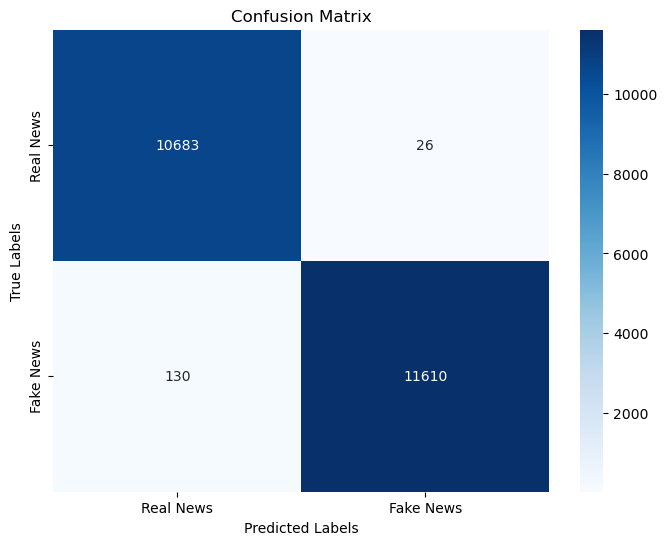

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume y_true and y_pred are your true labels and predictions
y_true = y_test  # Example: True labels
y_pred = model.predict(X_test_tfidf)  # Example: Predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

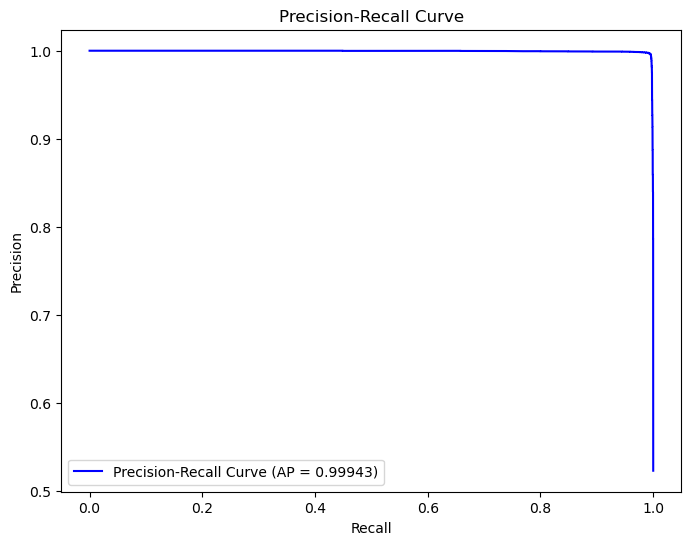

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get predicted probabilities for the positive class (real news = 1)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
precision, recall, _ = precision_recall_curve(y_true, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP = {average_precision_score(y_true, y_prob):.5f})')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

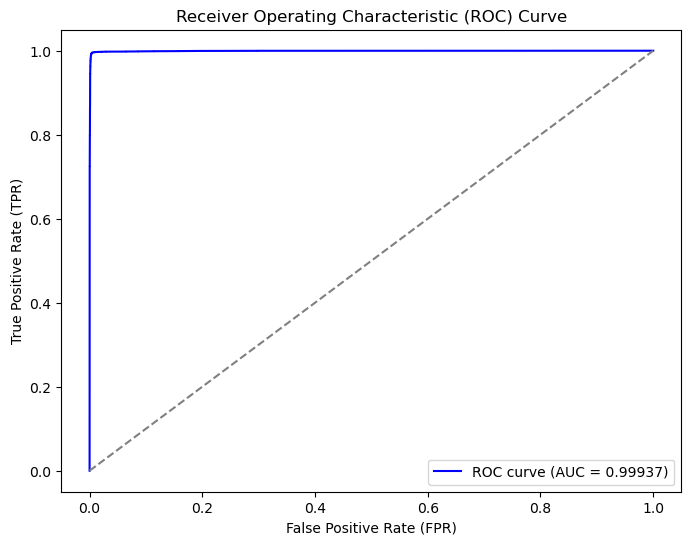

In [45]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (real news = 1)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

In [46]:
# Function to test on a fake news article
def predict_news(title, text):
    combined_text = title + " " + text
    cleaned_article = clean_text(combined_text)
    article_vectorized = vectorizer.transform([cleaned_article])
    prediction = model.predict(article_vectorized)[0]
    return "Real News" if prediction == 0 else "Fake News"


news_title = "Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing"
news_text = '''
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.
'''

print("Prediction:", predict_news(news_title,news_text))

Prediction: Fake News


In [47]:
# Function to test on a real news article
def predict_news(title, text):
    combined_text = title + " " + text
    cleaned_article = clean_text(combined_text)
    article_vectorized = vectorizer.transform([cleaned_article])
    prediction = model.predict(article_vectorized)[0]
    return "Real News" if prediction == 0 else "Fake News"


news_title = "U.S. military to accept transgender recruits on Monday: Pentagon"
news_text = '''
WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: “As mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.” Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal “great news.” “I’m hoping it means the government has come to see that there is no way to justify a ban and that it’s not good for the military or our country,” Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obama’s policy of accepting them. Trump said on Twitter at the time that the military “cannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.” Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trump’s ban while legal challenges to the Republican president’s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicants’ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept “some individuals who are not medically fit for service.” The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trump’s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the president’s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity.
'''

news_example = "Government increases tax to fight climate change."
print("Prediction:", predict_news(news_title,news_text))

Prediction: Real News


In [48]:
# Function to test on a real news article but still detecting fake
def predict_news(title, text):
    combined_text = title + " " + text
    cleaned_article = clean_text(combined_text)
    article_vectorized = vectorizer.transform([cleaned_article])
    prediction = model.predict(article_vectorized)[0]
    return "Real News" if prediction == 0 else "Fake News"


news_title = "Cost of living concerns go 'far beyond' GST; raising the tax not an easy choice: PM Wong"
news_text = '''
SINGAPORE: Singaporeans' concerns over the rising cost of living go "far beyond" the Goods and Services Tax (GST), said Prime Minister Lawrence Wong on Monday (Mar 3) as he reiterated the reasons for raising the tax.

"I know that for many Singaporeans, the biggest concern is the cost of living and understandably so. Prices have gone up, and it is tough for many families," Mr Wong said in a YouTube video titled Tackling Cost Pressures.

"Some wonder if the GST increase had made things worse. But let’s be honest, the reality is that what we are facing goes far beyond the GST."

The video comes days after the Budget debate, during which cost of living concerns were brought up.

Workers’ Party (WP) chief Pritam Singh had on the first day of the debate questioned the government’s move to raise the GST and “thereby turbocharging inflation”.

In his Budget round-up speech last week, Mr Wong debunked Mr Singh's claim, noting that external factors were the primary drivers of inflation in Singapore, and in the two years that the GST was increased, inflation according to the Consumer Price Index actually fell.

Mr Wong said in the video that inflation has surged due to wars and supply chain disruptions globally, with no country spared.


"We feel the pressures here in Singapore too, especially as a small and open economy. After all, we import almost everything we consume.

"Remember at the beginning of this decade, we were still in the thick of battle, fighting COVID-19," Mr Wong said, adding that it was a "time of great uncertainty" as they did not know how long the pandemic would last, how the virus would mutate and how many new waves of infections Singapore would face.

He said: "Our finances were stretched; we had gone to the President five times to use past reserves."

"We were not sure if we would have enough resources to recover from COVID, create jobs for our people, and look after our seniors. We did not know how deep a fiscal hole we would end up with."

Mr Wong added that at the same time, they knew healthcare spending increased each year, especially with Singapore's "rapidly ageing population".

"It was not an easy choice, but we knew we had to act responsibly," he said.

"That is why when the economy showed signs of stabilising, we decided to proceed with the GST increase."

But Mr Wong also pointed out that the Assurance Package was also rolled out to "effectively delay the impact of the GST increase" for most Singaporeans, adding that the package was enhanced over the years to "further cushion the impact" on the cost of living.

"In this Budget, we have provided additional measures to further ease cost pressures; including a special SG60 package with more help for every Singaporean," he said.

"We will keep doing what is necessary to help Singaporeans through these difficult times and for as long as it is needed."

'''

news_example = "Government increases tax to fight climate change."
print("Prediction:", predict_news(news_title,news_text))

Prediction: Fake News
